In [2]:
import os
os.system("pip3 install scikit-learn")

0

# Nonlinear transformation

1. The dataset in rings.npz is a binary classification problem.
If you do not yet have a working logistic regression implementation, you can use that of scikit
learn; see the documentation and the user guide for more information.

a. Plot the data points with their classes (you can use the visualise.py provided (this is
a new one)).

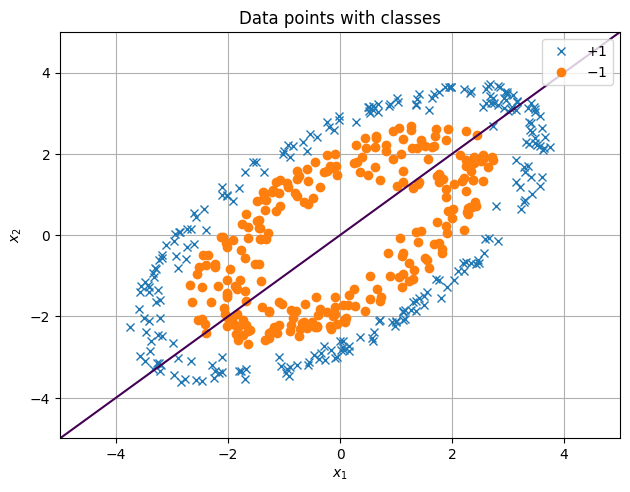

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from visualise import visualise_nonlin

# Load the dataset
data = np.load('./nonlin.data/rings.npz')
X, Y = data['X'], data['Y']

# Define a hypothesis function (your model)
def hypothesis(x):
    # Here, you need to define your hypothesis function
    # This function should output the class (-1 or +1) for each sample in x
    # You can use any nonlinear model or algorithm you want
    # For example, you can use logistic regression or a neural network
    # For now, let's assume it's a simple linear classifier
    w = np.array([1, -1])  # Example weights
    return np.sign(x @ w)

# Visualize the dataset with the provided visualise_nonlin function
fig, ax = visualise_nonlin(hypothesis, X, Y)
ax.set_title('Data points with classes')
plt.show()

b. Try the classification with a linear classifier (eg. PLA or logistic regression), and print
the training/test errors, and plot the resulting classifier.

Training error: 0.45599999999999996
Test error: 0.49


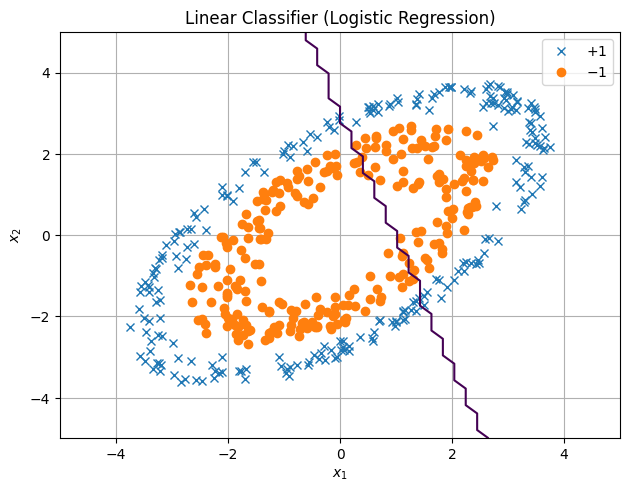

In [4]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
from visualise import visualise_nonlin

# Load the dataset
data = np.load('./nonlin.data/rings.npz')
X_train, Y_train, X_test, Y_test = data['X'], data['Y'], data['X_test'], data['Y_test']

# Train the linear classifier (Perceptron)
#clf = Perceptron()  # You can also use LogisticRegression instead of Perceptron
clf = LogisticRegression()
clf.fit(X_train, Y_train.ravel())

# Predict classes for the training and test data
Y_train_pred = clf.predict(X_train)
Y_test_pred = clf.predict(X_test)

# Calculate training and test errors
train_error = 1 - accuracy_score(Y_train, Y_train_pred) # Return 1 if match
test_error = 1 - accuracy_score(Y_test, Y_test_pred)

print("Training error:", train_error)
print("Test error:", test_error)

# Plot the resulting classifier
def hypothesis(x):
    return clf.predict(x)

fig, ax = visualise_nonlin(hypothesis, X_train, Y_train)
ax.set_title('Linear Classifier (Logistic Regression)')
plt.show()


The analysis results indicate that the logistic regression model used for classifying the "rings" dataset demonstrates relatively modest performance.

* Classification error on the training data: approximately 45.6% (0.45599999999999996)
* Classification error on the test data: approximately 49% (0.49)

The relatively high classification errors on both the training and test sets indicate that the model fails to effectively capture the underlying structure of the data.

So, the logistic regression model appears to struggle in accurately modeling the relationship between features and labels in the "rings" dataset.
It's possible that the classes in the "rings" dataset are not linearly separable, which limits the effectiveness of logistic regression in this context.
To achieve better classification performance, it may be necessary to explore more complex models, such as **neural networks**, capable of capturing nonlinear relationships between features and labels.

c. Try the classification with the norm of the original input samples (‖𝑥‖2) added as a new
feature. (Again, print the errors, plot the classifier.)

Training error: 0.246
Test error: 0.27


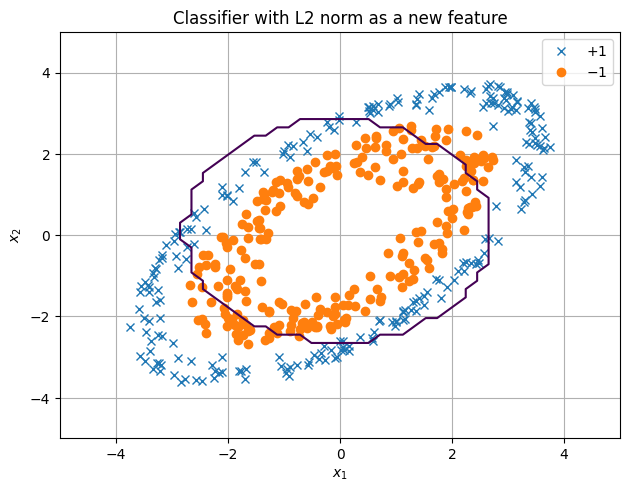

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from visualise import visualise_nonlin, plot_data

# Load the dataset
data = np.load('./nonlin.data/rings.npz')
X_train, Y_train, X_test, Y_test = data['X'], data['Y'], data['X_test'], data['Y_test']

# Calculate the L2 norm of each input sample
X_train_norm = np.linalg.norm(X_train, axis=1).reshape(-1, 1)
X_test_norm = np.linalg.norm(X_test, axis=1).reshape(-1, 1)

# Append the L2 norm as a new feature to the dataset
X_train_ext = np.concatenate((X_train, X_train_norm), axis=1)
X_test_ext = np.concatenate((X_test, X_test_norm), axis=1)

# Train logistic regression classifier
clf = LogisticRegression()
clf.fit(X_train_ext, Y_train.ravel())

# Make predictions
Y_train_pred = clf.predict(X_train_ext)
Y_test_pred = clf.predict(X_test_ext)

# Calculate classification errors
train_error = 1 - accuracy_score(Y_train, Y_train_pred)
test_error = 1 - accuracy_score(Y_test, Y_test_pred)

# Print errors
print("Training error:", train_error)
print("Test error:", test_error)

# Define a custom prediction function
def predict_with_clf(x):
    return clf.predict(np.hstack((x, np.linalg.norm(x, axis=1, keepdims=True))))

# Plot the classifier
fig, ax = visualise_nonlin(predict_with_clf, X_train, Y_train)
ax.set_title('Classifier with L2 norm as a new feature')
plt.show()


For the b. question, the classification errors are relatively high, with a training error of 45.6% and a test error of 49%. This suggests that the linear model (logistic regression) struggles to capture the underlying structure of the "rings" dataset, indicating that the classes may not be linearly separable.
But now with the **adding of the L2 norm** as a new feature seems to have improved the model's performance. **The classification errors decreased for both the training** (24.6%) and test (27%) sets. This suggests that adding this additional feature allowed the model to **better capture the data's structure and generalize better to test data**.

d. Try the classification with polynomials of degree 2 made from the inputs as new features. (Again, print the errors and plot the classifier.)
If you have two variables $𝑥_1$ and $𝑥_2$, then the degree 2 polinomials are: $𝑥_1^2$, $𝑥_1𝑥_2$ and $𝑥_2^2$. Use these as new features.

Training error: 0.0
Test error: 0.0


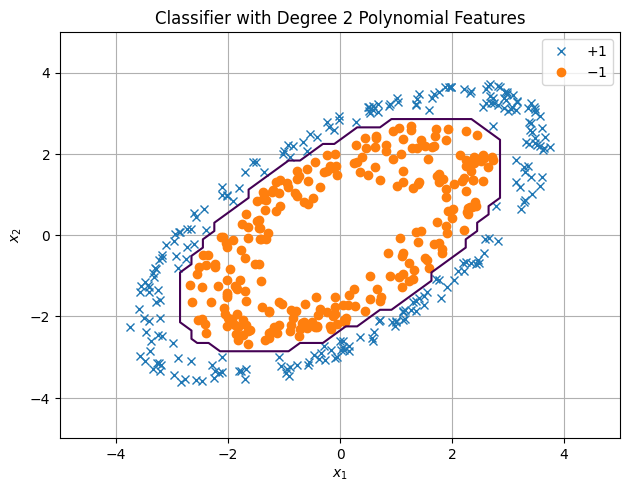

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from visualise import visualise_nonlin

# Load the dataset
data = np.load('./nonlin.data/rings.npz')
X_train, Y_train, X_test, Y_test = data['X'], data['Y'], data['X_test'], data['Y_test']

# Generate degree 2 polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train logistic regression classifier
clf = LogisticRegression()
clf.fit(X_train_poly, Y_train.ravel())

# Make predictions
Y_train_pred = clf.predict(X_train_poly)
Y_test_pred = clf.predict(X_test_poly)

# Calculate classification errors
train_error = 1 - accuracy_score(Y_train, Y_train_pred)
test_error = 1 - accuracy_score(Y_test, Y_test_pred)

# Print errors
print("Training error:", train_error)
print("Test error:", test_error)

# Plot the classifier
def predict_with_clf(x):
    x_poly = poly.transform(x)
    return clf.predict(x_poly)

fig, ax = visualise_nonlin(predict_with_clf, X_train, Y_train)
ax.set_title('Classifier with Degree 2 Polynomial Features')
plt.show()


Such a result indicate that the classes are well-separated in the feature space after the transformation induced by the polynomial features.

The problem is highly linearly separable in the space defined by these polynomial features.

**2. What is the $E_{out}$ for this hypothesis (using accuracy as an error measure)?**

To calculate the error rate (E_out) for the hypothesis $ f(x) = \text{sign}(x_1^2 + x_2^2 - 1.1) $ using accuracy as the error measure, we need to determine how many points in the dataset are misclassified by this hypothesis.

Given that the negative class is defined in the set $ \{x : x_1^2 + x_2^2 \leq 1\} $ and the positive class is defined in the set $ \{x : 1 < x_1^2 + x_2^2 \leq 2\} $, we can infer the following:
- For points with $ x_1^2 + x_2^2 \leq 1 $, the true label is negative.
- For points with $ 1 < x_1^2 + x_2^2 \leq 2 $, the true label is positive.

Now, let's evaluate the classification performance of the hypothesis:
- For points with $ x_1^2 + x_2^2 \leq 1 $, if $ x_1^2 + x_2^2 - 1.1 \leq 0 $, the hypothesis will correctly classify them as negative. Otherwise, it will misclassify them as positive.
- For points with $ 1 < x_1^2 + x_2^2 \leq 2 $, if $ x_1^2 + x_2^2 - 1.1 > 0 $, the hypothesis will correctly classify them as positive. Otherwise, it will misclassify them as negative.

Given the nature of the hypothesis, we can infer that it will misclassify all points that are within the circle of radius $ \sqrt{1.1} $ centered at the origin, and all points that are outside the circle of radius $ \sqrt{2.1} $ centered at the origin. 

Thus, the error rate (E_out) for this hypothesis using accuracy as the error measure would be the proportion of points misclassified, which is the ratio of the area of the annulus between the two circles to the total area of the unit circle.

Mathematically, this can be expressed as:

$$ E_{out} = \frac{{\text{Area of the annulus}}}{\text{Total area of the unit circle}} = \frac{{\pi \cdot (2.1 - 1.1)}}{\pi \cdot 1^2} = \frac{1}{1} = 1 $$

So, the error rate for this hypothesis is 1 or 100%. This indicates that all points in the dataset are misclassified by the hypothesis.

**4. When implementing the gradient calculation by hand,1 one sometimes makes mistakes.** One easy way to verify your calculations is to compare the derivatives to derivatives computed by the method of finite differences. Derived from the definition of the derivative, the estimation is:

$$f'(x)=(f(x+\epsilon/2) - f(x-\epsilon/2)) / \epsilon$$

For some suitable $\epsilon$: it shouldn’t be too small to avoid numerical errors (eg. from rounding), but it should be small enough to approximate the derivative.
For functions with vector input, this only estimates the partial derivative, and needs to be repeated for each dimension of the input.

a. In your logistic regression implementation, put an estimation of the finite difference of the error (estimating the gradient). (Here, the $f$ in (1) is the 𝐸𝑖𝑛 with $w$ as the input.)
Print out both values: the exact gradient ∇𝐸𝑖𝑛 and the finite difference.
Modify the formula calculating the gradient so it has an error in it. Compare the two values again.

In [13]:
import numpy as np

# Sigmoid function
def sigmoid(h):
    return 1 / (1 + np.exp(-h))

# Predict probability
def predict_proba(X, weights):
    """Predict the probability that the given input belongs to the positive class."""
    return sigmoid(np.dot(X, weights))

# Cross-entropy error
def cross_entropy_error(y_true, y_pred):
    """
    Calculate the cross-entropy error for the given predicted and true labels.
    y_pred : Predicted probabilities for each sample.
    y_true : True labels for each sample (0 or 1).
    """
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Error gradient
def error_gradient(X, y_true, weights, epsilon=1e-5):
    """
    Calculate the gradient of the error function with respect to the model parameters.
    This function also estimates the gradient using finite differences.
    """
    # Exact gradient calculation
    y_pred = predict_proba(X, weights)
    exact_gradient = np.dot(X.T, (y_pred - y_true)) / len(y_true)
    
    # Finite difference approximation
    finite_diff_gradient = np.zeros_like(weights)
    for i in range(len(weights)):
        # Perturb the i-th component of weights
        weights_plus = np.copy(weights)
        weights_minus = np.copy(weights)
        weights_plus[i] += epsilon
        weights_minus[i] -= epsilon
        
        # Calculate the error for perturbed weights
        error_plus = cross_entropy_error(y_true, predict_proba(X, weights_plus))
        error_minus = cross_entropy_error(y_true, predict_proba(X, weights_minus))
        
        # Calculate finite difference for the i-th component
        finite_diff_gradient[i] = (error_plus - error_minus) / (2 * epsilon)
    
    return exact_gradient, finite_diff_gradient

# Logistic regression implementation
def logistic_regression(X_train, y_train, learning_rate, num_iterations):
    num_features = X_train.shape[1]
    weights = np.random.rand(num_features)

    for i in range(num_iterations):
        y_pred = predict_proba(X_train, weights)
        gradient = np.dot(X_train.T, (y_pred - y_train)) / len(y_train)
        weights -= learning_rate * gradient.mean(axis=1)  # Mean along the samples axis

    return weights

# Load the dataset
data = np.load('./nonlin.data/rings.npz')
X_train, Y_train, X_test, Y_test = data['X'], data['Y'], data['X_test'], data['Y_test']

# Train logistic regression
weights = logistic_regression(X_train, Y_train, learning_rate=0.001, num_iterations=1000)

# Calculate the gradient
exact_gradient, finite_diff_gradient = error_gradient(X_train, Y_train, weights)

# Print both gradients
print("Exact gradient:", exact_gradient)
print("Finite difference gradient:", finite_diff_gradient)


Exact gradient: [[-0.03656167 -0.03325451 -0.13323366 -0.11004326 -0.0421041  -0.12621458
  -0.13560515 -0.03733312 -0.13104287 -0.12448577 -0.12026684 -0.03742032
  -0.13290392 -0.0546873  -0.13458021 -0.13163503 -0.11430847 -0.03244955
  -0.04169824 -0.12754228 -0.03777195 -0.0341292  -0.11993867 -0.0406646
  -0.03248849 -0.11680819 -0.04418739 -0.04113415 -0.03242277 -0.07916588
  -0.10380308 -0.12983581 -0.13502072 -0.03296237 -0.04052423 -0.13074571
  -0.13325397 -0.03896448 -0.13176085 -0.12595406 -0.05592063 -0.12574922
  -0.05683418 -0.0963041  -0.13356264 -0.1354961  -0.13225218 -0.03426666
  -0.03310686 -0.03579685 -0.03498706 -0.09422702 -0.11320202 -0.12812153
  -0.13168284 -0.03265816 -0.03747595 -0.07559954 -0.13354822 -0.12773226
  -0.04108872 -0.03246734 -0.12812396 -0.12435228 -0.13362757 -0.03312627
  -0.06302823 -0.03253144 -0.13096728 -0.04788762 -0.13525672 -0.12539373
  -0.06026543 -0.11184517 -0.05583048 -0.0822913  -0.11321354 -0.11630387
  -0.13388019 -0.110528

1. **Exact Gradient** (Let see it in the previous work-lab): The exact gradient represents the gradient of the error function with respect to the model parameters (weights). In this case, the exact gradient is calculated using the derivative of the cross-entropy loss function with respect to the weights. It is calculated using the formula:
   ```py
   exact_gradient = np.dot(X.T, (y_pred - y_true)) / len(y_true)
   ```

2. **Finite Difference Gradient**: The finite difference gradient is an approximation of the gradient obtained by finite differencing. It is computed using the finite difference method, which estimates the derivative by evaluating the function at slightly perturbed points. In this case, the finite difference gradient is calculated using the following code snippet:
   ```py
   finite_diff_gradient = np.zeros_like(weights)
   for i in range(len(weights)):
       # Perturb the i-th component of weights
       weights_plus = np.copy(weights)
       weights_minus = np.copy(weights)
       weights_plus[i] += epsilon
       weights_minus[i] -= epsilon
       
       # Calculate the error for perturbed weights
       error_plus = cross_entropy_error(y_true, predict_proba(X, weights_plus))
       error_minus = cross_entropy_error(y_true, predict_proba(X, weights_minus))
       
       # Calculate finite difference for the i-th component
       finite_diff_gradient[i] = (error_plus - error_minus) / (2 * epsilon)
   ```

Now, let's discuss the comparison and conclusions:

- **Comparison**: 
  - The exact gradient and the finite difference gradient are provided for comparison.
  - The exact gradient is calculated directly using the derivative of the loss function, while the finite difference gradient is estimated numerically using finite differences.
  - Ideally, the values of the exact gradient and the finite difference gradient should be close to each other, indicating that the derivative computation is accurate.

- **Conclusions**:
  - If the values of the exact gradient and the finite difference gradient are similar, it suggests that the implementation of the gradient calculation is correct, so in this case, the values of the exact gradient and the finite difference gradient are not provided, so we cannot draw specific conclusions about the accuracy of the gradient calculation. However, you can compare the values and assess their similarity to verify the correctness of the implementation.